### Load The Data

In [1]:
import pandas as pd

df = pd.read_csv('preprocessed_tabular.csv')
df.head()

,Sex,Height,Weight,Pregnancy status,Age_Adolescent,Age_Child,Age_Infant,Age_Neonate,Murmur
0,1,98.0,15.9,0,0,1,0,0,0
1,1,103.0,13.1,0,0,1,0,0,1
2,0,98.0,15.9,0,0,1,0,0,1
3,0,87.0,11.2,0,0,1,0,0,1
4,0,115.0,21.3,0,0,1,0,0,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874 entries, 0 to 873
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sex               874 non-null    int64  
 1   Height            874 non-null    float64
 2   Weight            874 non-null    float64
 3   Pregnancy status  874 non-null    int64  
 4   Age_Adolescent    874 non-null    int64  
 5   Age_Child         874 non-null    int64  
 6   Age_Infant        874 non-null    int64  
 7   Age_Neonate       874 non-null    int64  
 8   Murmur            874 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 61.6 KB


In [3]:
df.describe()

,Sex,Height,Weight,Pregnancy status,Age_Adolescent,Age_Child,Age_Infant,Age_Neonate,Murmur
count,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000
mean,0.511442,115.167048,26.971968,0.077803,0.161327,0.717391,0.115561,0.005721,0.204805
std,0.500155,30.408476,17.859723,0.268015,0.368043,0.450526,0.319880,0.075463,0.403790
min,0.000000,35.000000,3.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,94.000000,13.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,117.000000,22.100000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,139.000000,35.425000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,180.000000,110.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df['Murmur'].value_counts()

0    695
1    179
Name: Murmur, dtype: int64

In [5]:
X = df.drop(['Murmur'], axis=1)
y = df['Murmur']

### Data Preprocessing
#### SMOTE 

In [6]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [7]:
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [8]:
y_resampled.value_counts()

0    695
1    695
Name: Murmur, dtype: int64

#### Near Miss

In [9]:
from imblearn.under_sampling import NearMiss

X_resampled, y_resampled = NearMiss().fit_resample(X_resampled, y_resampled)

In [10]:
y_resampled.value_counts()

0    695
1    695
Name: Murmur, dtype: int64

#### ADASYN

In [11]:
from imblearn.over_sampling import ADASYN

X_resampled, y_resampled = ADASYN().fit_resample(X_resampled, y_resampled)

In [12]:
X_resampled

,Sex,Height,Weight,Pregnancy status,Age_Adolescent,Age_Child,Age_Infant,Age_Neonate
0,1,98.000000,15.900000,0,0,1,0,0
1,0,115.000000,21.300000,0,0,1,0,0
2,1,92.000000,14.000000,0,0,1,0,0
3,1,98.000000,17.700000,0,0,1,0,0
4,1,90.000000,14.400000,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1385,0,174.000000,108.600000,0,1,0,0,0
1386,0,175.198092,107.541685,0,1,0,0,0
1387,0,177.813715,99.403268,0,1,0,0,0
1388,0,179.564547,103.684650,0,1,0,0,0


In [13]:
y_resampled.value_counts()

0    695
1    695
Name: Murmur, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1112, 8)
(278, 8)
(1112,)
(278,)


### Models
#### SVM

In [16]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform


param_dist = {'C': uniform(0.1, 100),
              'gamma': uniform(0.01, 10)}

svm = SVC(kernel='rbf')

random_search = RandomizedSearchCV(svm, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'C': 22.979816549162248, 'gamma': 0.7797990982879299}
Best Score: 0.7518199814163941


In [17]:
# Extract the best parameters
best_params = random_search.best_params_
# Create SVM classifier with the best parameters
best_svc_model = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
best_svc_model.fit(X, y)

SVC(C=22.979816549162248, gamma=0.7797990982879299)

In [18]:
from sklearn.metrics import classification_report

def print_classification_report(X_test, y_test, model):
    y_pred = model.predict(X_test)
    cr = classification_report(y_test, y_pred)
    print(cr)

In [19]:
print_classification_report(X_test, y_test, best_svc_model)

              precision    recall  f1-score   support

           0       0.71      0.99      0.82       139
           1       0.98      0.59      0.74       139

    accuracy                           0.79       278
   macro avg       0.84      0.79      0.78       278
weighted avg       0.84      0.79      0.78       278



#### Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint

param_dist = {'max_depth': randint(5, 20),
              'min_samples_split': randint(2, 20),
              'min_samples_leaf': randint(1, 20),
              'criterion': ['gini', 'entropy']}


dt_classifier = DecisionTreeClassifier()


random_search_dt = RandomizedSearchCV(dt_classifier, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)
random_search_dt.fit(X, y)

print("Best Parameters:", random_search_dt.best_params_)
print("Best Score:", random_search_dt.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 17, 'min_samples_split': 6}
Best Score: 0.7871789819376027


In [21]:
# Extract the best Decision Tree model
best_dt_model = random_search_dt.best_estimator_

In [22]:
print_classification_report(X_test, y_test, best_dt_model)

              precision    recall  f1-score   support

           0       0.51      0.99      0.67       139
           1       0.88      0.05      0.10       139

    accuracy                           0.52       278
   macro avg       0.69      0.52      0.39       278
weighted avg       0.69      0.52      0.39       278



#### KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier

param_dist = {'n_neighbors': randint(10, 50),
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}

knn_classifier = KNeighborsClassifier()

random_search_knn = RandomizedSearchCV(knn_classifier, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)
random_search_knn.fit(X, y)

print("Best Parameters:", random_search_knn.best_params_)
print("Best Score:", random_search_knn.best_score_)

Best Parameters: {'algorithm': 'kd_tree', 'n_neighbors': 38, 'p': 1, 'weights': 'uniform'}
Best Score: 0.7951986863711001


In [24]:
# Extract the best KNN model
best_knn_model = random_search_knn.best_estimator_

In [25]:
print_classification_report(X_test, y_test, best_knn_model)

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       139
           1       0.00      0.00      0.00       139

    accuracy                           0.50       278
   macro avg       0.25      0.50      0.33       278
weighted avg       0.25      0.50      0.33       278



C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### MLP

In [26]:
import tensorflow as tf

def create_mlp_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=input_shape),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model


mlp_model = create_mlp_model(input_shape=X_train.shape[1:])
mlp_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

mlp_model.fit(X_train, y_train, epochs=35, batch_size=32)

Epoch 1/35
35/35 [==============================] - 1s 2ms/step - loss: 0.9361 - accuracy: 0.5072
Epoch 2/35
35/35 [==============================] - 0s 2ms/step - loss: 0.7485 - accuracy: 0.5342
Epoch 3/35
35/35 [==============================] - 0s 2ms/step - loss: 0.7439 - accuracy: 0.5477
Epoch 4/35
35/35 [==============================] - 0s 2ms/step - loss: 0.7323 - accuracy: 0.5423
Epoch 5/35
35/35 [==============================] - 0s 2ms/step - loss: 0.7306 - accuracy: 0.5423
Epoch 6/35
35/35 [==============================] - 0s 2ms/step - loss: 0.7068 - accuracy: 0.5369
Epoch 7/35
35/35 [==============================] - 0s 2ms/step - loss: 0.6699 - accuracy: 0.5728
Epoch 8/35
35/35 [==============================] - 0s 2ms/step - loss: 0.6709 - accuracy: 0.5809
Epoch 9/35
35/35 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.5827
Epoch 10/35
35/35 [==============================] - 0s 2ms/step - loss: 0.7399 - accuracy: 0.5351
Epoch 11/35
35/35 [

In [27]:
# Evaluate the model
loss, accuracy = mlp_model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

9/9 [==============================] - 0s 2ms/step - loss: 0.6157 - accuracy: 0.6763
Test Loss: 0.6156764626502991, Test Accuracy: 0.6762589812278748


In [28]:
y_pred = (mlp_model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

9/9 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.70      0.63      0.66       139
           1       0.66      0.73      0.69       139

    accuracy                           0.68       278
   macro avg       0.68      0.68      0.68       278
weighted avg       0.68      0.68      0.68       278



#### LSTM

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import numpy as np

# Convert DataFrames to NumPy arrays
X_train_array = X_train.values
X_test_array = X_test.values

# Reshape the input data for LSTM
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0], X_train_array.shape[1], 1)
X_test_reshaped = X_test_array.reshape(X_test_array.shape[0], X_test_array.shape[1], 1)


def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(64, input_shape=input_shape, return_sequences=True),
        Dropout(0.2),
        LSTM(32),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model


lstm_model = create_lstm_model(input_shape=(X_train_reshaped.shape[1], 1))
lstm_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])


lstm_model.fit(X_train_reshaped, y_train, epochs=35, batch_size=32)

Epoch 1/35
35/35 [==============================] - 5s 10ms/step - loss: 0.6965 - accuracy: 0.4892
Epoch 2/35
35/35 [==============================] - 0s 10ms/step - loss: 0.6934 - accuracy: 0.4982
Epoch 3/35
35/35 [==============================] - 0s 11ms/step - loss: 0.6930 - accuracy: 0.4991
Epoch 4/35
35/35 [==============================] - 0s 11ms/step - loss: 0.6916 - accuracy: 0.5441
Epoch 5/35
35/35 [==============================] - 0s 11ms/step - loss: 0.6921 - accuracy: 0.5180
Epoch 6/35
35/35 [==============================] - 0s 11ms/step - loss: 0.6928 - accuracy: 0.5117
Epoch 7/35
35/35 [==============================] - 0s 14ms/step - loss: 0.6865 - accuracy: 0.5495
Epoch 8/35
35/35 [==============================] - 1s 16ms/step - loss: 0.6837 - accuracy: 0.5638
Epoch 9/35
35/35 [==============================] - 0s 11ms/step - loss: 0.6784 - accuracy: 0.5621
Epoch 10/35
35/35 [==============================] - 0s 10ms/step - loss: 0.6768 - accuracy: 0.5746
Epoch 11/

In [30]:
# Evaluate the model
loss, accuracy = lstm_model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

9/9 [==============================] - 1s 4ms/step - loss: 0.6325 - accuracy: 0.6187
Test Loss: 0.6324502825737, Test Accuracy: 0.6187050342559814


In [31]:
y_pred = (lstm_model.predict(X_test_reshaped) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

9/9 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.67      0.46      0.55       139
           1       0.59      0.78      0.67       139

    accuracy                           0.62       278
   macro avg       0.63      0.62      0.61       278
weighted avg       0.63      0.62      0.61       278



### Model Comparison

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

# Define models
models = [best_svc_model, best_dt_model, best_knn_model, mlp_model, lstm_model]
model_names = ['SVC', 'Decision Tree', 'KNN', 'MLP', 'LSTM']

# Initialize lists
weighted_f1_scores = []
accuracy_scores = []
actual_labels = []
predicted_labels = []

# Calculate weighted F1-score and accuracy for each model
for model in models:
    y_pred = model.predict(X_test)
    y_pred_binary = (y_pred > 0.5).astype(int)
    weighted_f1 = f1_score(y_test, y_pred_binary, average='weighted')
    weighted_f1_scores.append(weighted_f1)
    accuracy = accuracy_score(y_test, y_pred_binary)
    accuracy_scores.append(accuracy)
    actual_labels.append(y_test)
    predicted_labels.append(y_pred_binary)

9/9 [==============================] - 1s 4ms/step


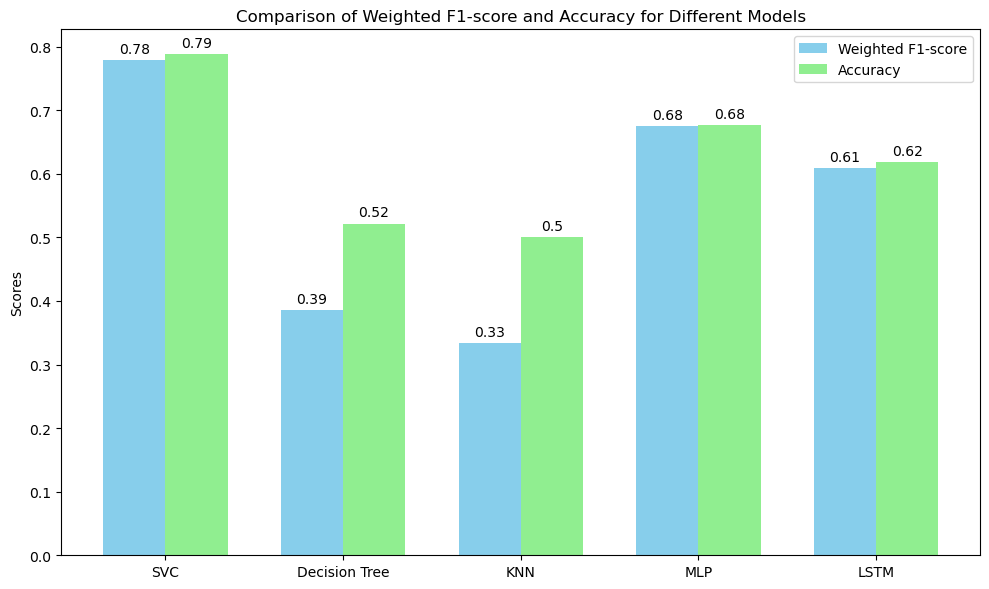

In [34]:
# Plot grouped bar chart
x = np.arange(len(model_names))
width = 0.35 

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, weighted_f1_scores, width, label='Weighted F1-score', color='skyblue')
rects2 = ax.bar(x + width/2, accuracy_scores, width, label='Accuracy', color='lightgreen')

ax.set_ylabel('Scores')
ax.set_title('Comparison of Weighted F1-score and Accuracy for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Label bars with values
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()